In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


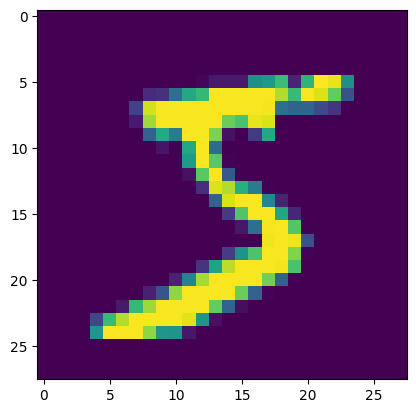

In [4]:
plt.imshow(X_train[0])

In [5]:
X_train = X_train/255
X_test = X_test/255

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [7]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [8]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [9]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(lr=1.5),metrics=['accuracy'])

In [10]:
autoencoder.fit(X_train, X_train, epochs=5,validation_data=[X_test, X_test])

Epoch 1/5
1875/1875 [==============================] - 15s 5ms/step - loss: 0.6903 - accuracy: 0.0358 - val_loss: 0.6873 - val_accuracy: 0.0410
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6830 - accuracy: 0.0403 - val_loss: 0.6763 - val_accuracy: 0.0376
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5193 - accuracy: 0.0468 - val_loss: 0.2792 - val_accuracy: 0.0690
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2726 - accuracy: 0.0701 - val_loss: 0.2682 - val_accuracy: 0.0689
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2665 - accuracy: 0.0698 - val_loss: 0.2644 - val_accuracy: 0.0708


In [11]:
passed_images = autoencoder.predict(X_test[:10])

1/1 [==============================] - 0s 129ms/step


Original image with 28 X 28 = 784 dimensions: 


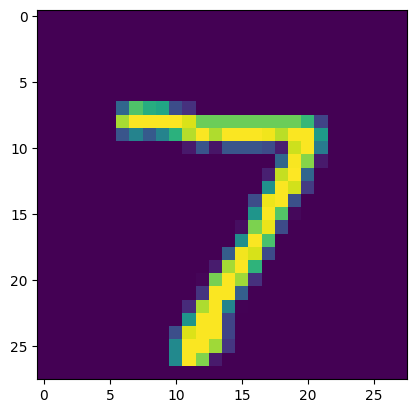

Reconstructed image 25 dimensions to 784 dimensions: 


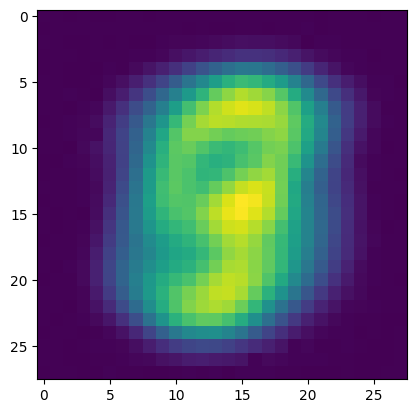

In [12]:
n = 0

print("Original image with 28 X 28 = 784 dimensions: ")
plt.imshow(X_test[n])
plt.show()
print("Reconstructed image 25 dimensions to 784 dimensions: ")
plt.imshow(passed_images[n])

In [13]:
from tensorflow.keras.layers import GaussianNoise

In [14]:
sample=GaussianNoise(0.2)
noisey=sample(X_test[:10],training=True)

Original image: 


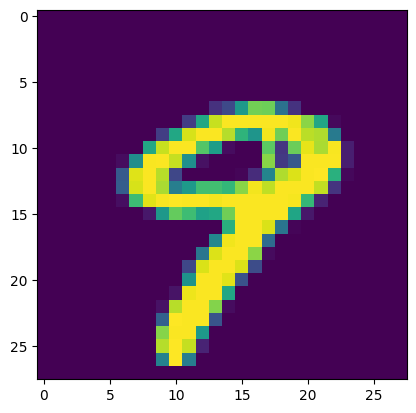

Noisy version : 


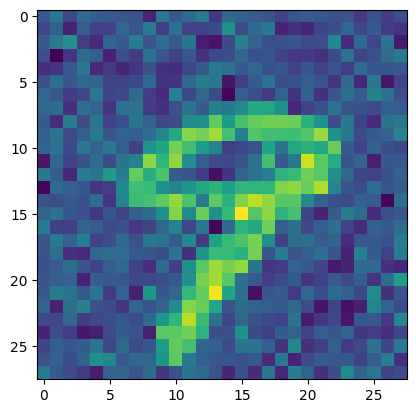

In [15]:
n = 9

print("Original image: ")
plt.imshow(X_test[n])
plt.show()
print("Noisy version : ")
plt.imshow(noisey[n])

In [16]:
import tensorflow as tf

tf.random.set_seed(101)
np.random.seed(101)

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [17]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [18]:
noise_remover=Sequential([encoder,decoder])

noise_remover.compile(loss='binary_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])

In [19]:
noise_remover.fit(X_train,X_train,epochs=8)

Epoch 1/8
1875/1875 [==============================] - 13s 5ms/step - loss: 0.1735 - accuracy: 0.1781
Epoch 2/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1315 - accuracy: 0.2305
Epoch 3/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1221 - accuracy: 0.2476
Epoch 4/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1166 - accuracy: 0.2572
Epoch 5/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1127 - accuracy: 0.2635
Epoch 6/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1097 - accuracy: 0.2680
Epoch 7/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1075 - accuracy: 0.2724
Epoch 8/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1060 - accuracy: 0.2757


In [20]:
ten_noisey_images=sample(X_test[:10],training=True)

denoised=noise_remover(ten_noisey_images)

Original:


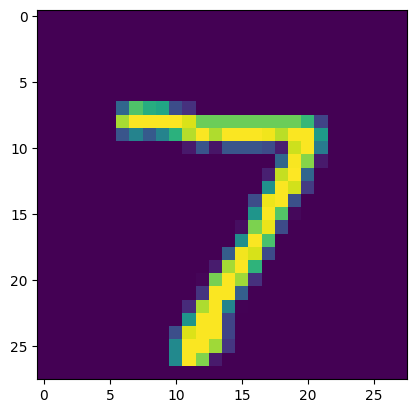

Noise Added:


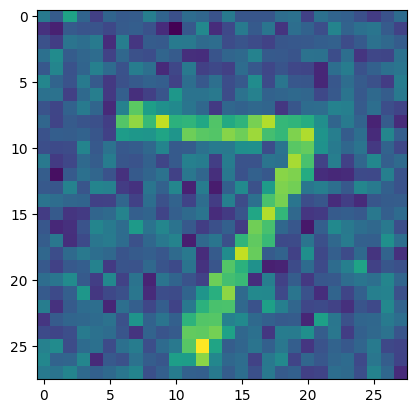

Noise reduction:


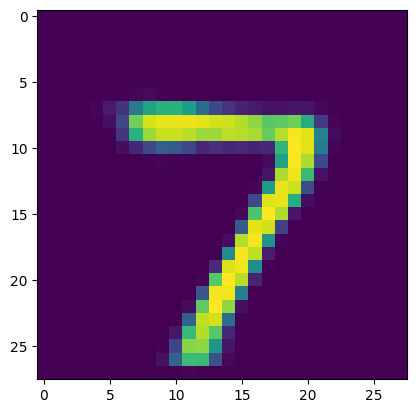

In [21]:
n=0

print("Original:")
plt.imshow(X_test[n])
plt.show()

print("Noise Added:")
plt.imshow(ten_noisey_images[n])
plt.show()

print("Noise reduction:")
plt.imshow(denoised[n])
plt.show()